# Tutorial on how to use the [pyPhenoPop](https://github.uio.no/leonargs/pyPhenoPop) package for phenotypic deconvolution in heterogeneous cancer cell populations using drug screening data

For details on the method, we refer to the original [publication](https://www.biorxiv.org/content/10.1101/2022.01.17.476604v2).

The main function of the package is the `mixture_id` function which can be imported via `from pyphenopop.pyphenopop import mixture_id`

In [1]:
from pyphenopop.mixpopid import mixture_id

`mixture_id` has 5 required and 6 optional arguments (see `help(mixture_id)` for details). The data needs to be provided as `csv` file, where the rows are the cell counts for different concentrations of the drug and the columns are timepoints and replicates. The format is structured as follows:

|  | |
|------------------------|------------------------|
| replicate1_time1_dose1 | replicate1_time1_dose2 |
| replicate2_time1_dose1 | replicate2_time1_dose2 |
| replicate1_time2_dose1 | replicate1_time2_dose2 |
| replicate2_time2_dose1 | replicate2_time2_dose2 |

Here we use simulated data from [Köhn-Luque et al.](https://www.biorxiv.org/content/10.1101/2022.01.17.476604v2), corresponding to the data used in Figure 2a, 4th row. The data can be found in the `example` folder as `DATA-2-case-1-Noise-50-mix-0.5.csv`.

We can start by plotting the data before applying the PhenoPop method to it.

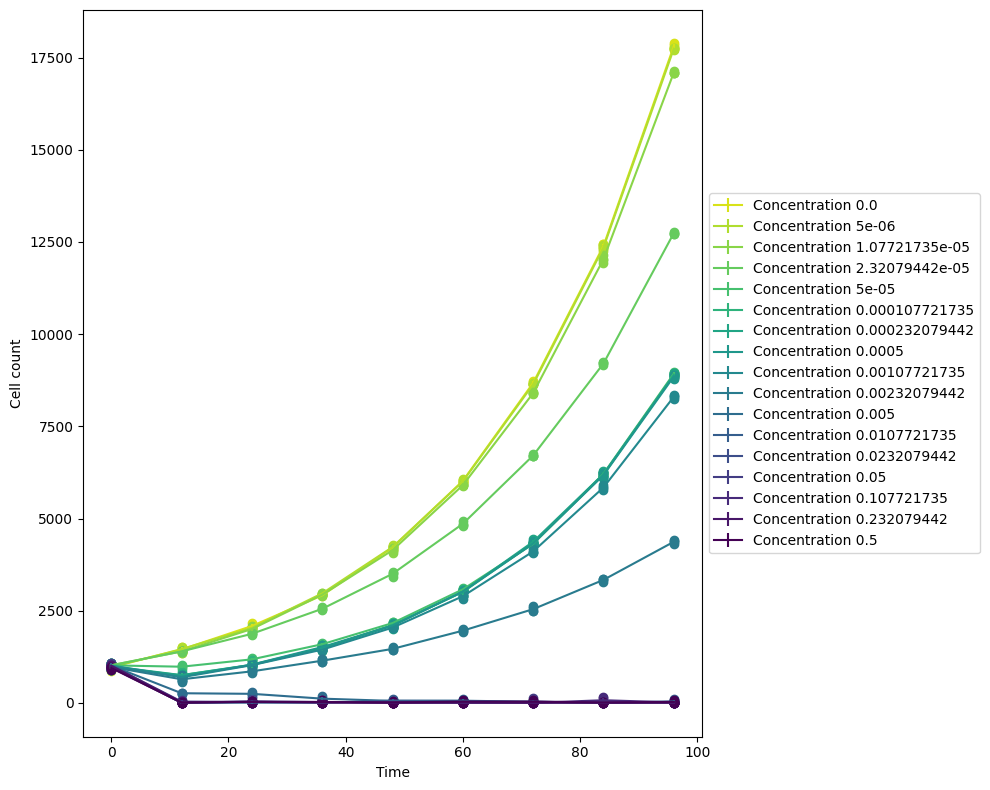

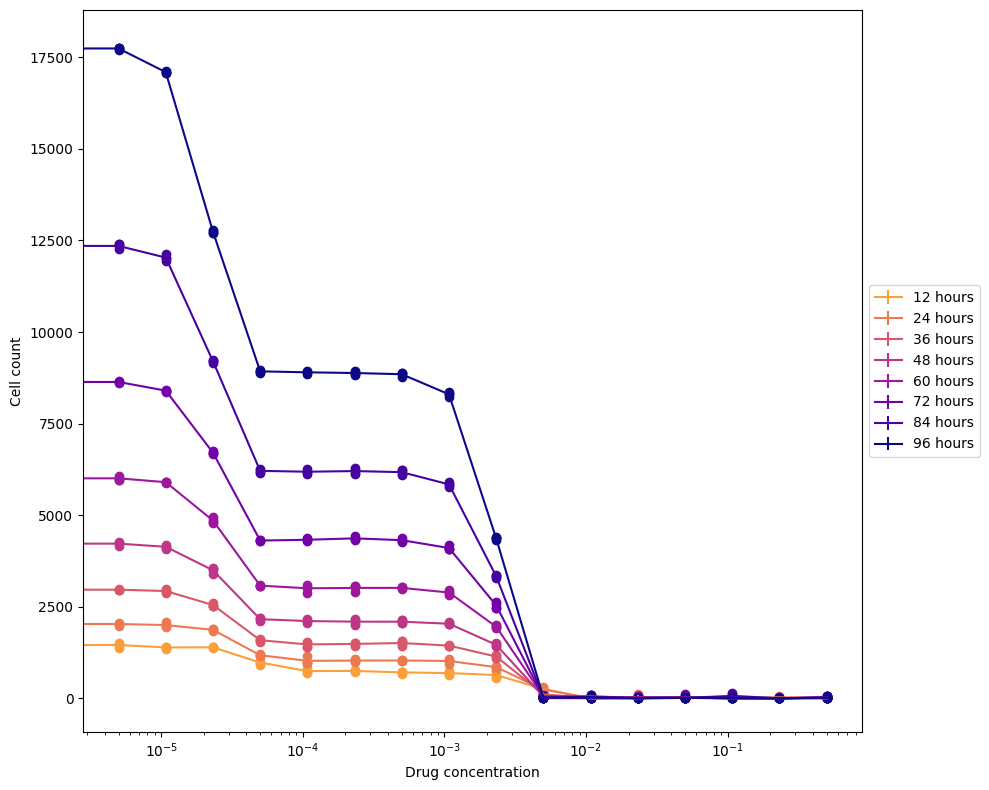

In [15]:
from pyphenopop.plotting import *

# Specify data
example_file = './DATA-2-case-1-Noise-50-mix-0.5.csv'

num_replicates = 4

timepoints = [0, 12, 24, 36, 48, 60, 72, 84, 96]

concentrations = [0.00000000e+00, 5.00000000e-06, 1.07721735e-05, 2.32079442e-05,
       5.00000000e-05, 1.07721735e-04, 2.32079442e-04, 5.00000000e-04,
       1.07721735e-03, 2.32079442e-03, 5.00000000e-03, 1.07721735e-02,
       2.32079442e-02, 5.00000000e-02, 1.07721735e-01, 2.32079442e-01,
       5.00000000e-01]

plot_in_time(example_file, num_replicates, timepoints, concentrations);
plot_in_conc(example_file, num_replicates, timepoints, concentrations);

Next, we apply the PhenoPop method with maximal 4 subpopulations and 5 local optimization runs per subpopulation. Here we use 'BIC' as model selection criteria.

In [2]:
max_subpopulations = 4
num_local_optimizations = 500
parameter_bounds = {'alpha': (0.0, 0.1), 'b': (1e-6, 1.0), 'E': (1e-06, 15), 'n': (0.01, 10)}
model_selection_method = 'BIC'
result = mixture_id(max_subpopulations, 
                    example_file, 
                    timepoints, 
                    concentrations, 
                    num_replicates, 
                    num_optim=num_local_optimizations,
                   bounds_model=parameter_bounds,
                   selection_method=model_selection_method)

Optimizing for 1 subpopulation(s)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:37<00:00,  6.68it/s]


Optimizing for 2 subpopulation(s)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [02:35<00:00,  1.61it/s]


Optimizing for 3 subpopulation(s)


 17%|████████████████████████████▍                                                                                                                                        | 43/250 [00:46<03:07,  1.10it/s]

optimization failed for 3 subpopulations and start 42, with initial parameters [4.18345285e-01 1.49379785e-02 4.92514287e-02 8.43641191e-01
 9.26598877e+00 1.53677527e+00 9.62394029e-02 2.06785370e-01
 1.03273531e+01 2.00186781e+00 2.97428923e-02 8.34620478e-01
 1.46044488e+00 3.81648894e-01 4.80619500e+03 4.62891016e+03].Error message: `x0` violates bound constraints.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [05:05<00:00,  1.22s/it]


Optimizing for 4 subpopulation(s)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [08:11<00:00,  1.97s/it]

Estimated number of cell populations based on BIC: 2
Minimal negative log-likelihood value found: 3507.768005844924
Mixture parameter(s):  [0.4995320537526726, 0.5004679462473274]
Model parameters for subpopulation 1:
Estimated GR50: 0.00038792228604268576
alpha :  0.030529099536003565
b :  0.0030694219259594104
E :  0.00012962944392896585
n :  2.6394186352888624
Model parameters for subpopulation 2:
Estimated GR50: 0.06769840388284462
alpha :  0.03000999904098727
b :  1.876195762857808e-05
E :  0.012108061271829677
n :  2.993399689805204
Sigma high: 323.3597887840105
Sigma low: 69.03400472152806


The result dictionary contains a summary of the optimization results and more detailed results for the different subpopulations. `fval` and `parameters` are the negative log-likelihood value and the parameters for all local optimizations. `final_fval` and `final_parameters` are the respective results of the overall best run.

In [3]:
print('Keys of the result dict:\n', result.keys())
print('Keys per subpopulation:\n', result['2_subpopulations'].keys())
print('Summary:\n', result['summary'])


Keys of the result dict:
 dict_keys(['1_subpopulations', '2_subpopulations', '3_subpopulations', '4_subpopulations', 'summary'])
Keys per subpopulation:
 dict_keys(['fval', 'parameters', 'BIC', 'AIC', 'final_fval', 'final_parameters', 'gr50'])
Summary:
 {'estimated_num_populations': 2, 'final_neg_log_likelihood': 3507.768005844924, 'best_optimization_idx': 80, 'final_parameters': array([4.99532054e-01, 3.05290995e-02, 3.06942193e-03, 1.29629444e-04,
       2.63941864e+00, 3.00099990e-02, 1.87619576e-05, 1.21080613e-02,
       2.99339969e+00, 3.23359789e+02, 6.90340047e+01])}


After performing parameter optimization, the results can be plotted in different ways.

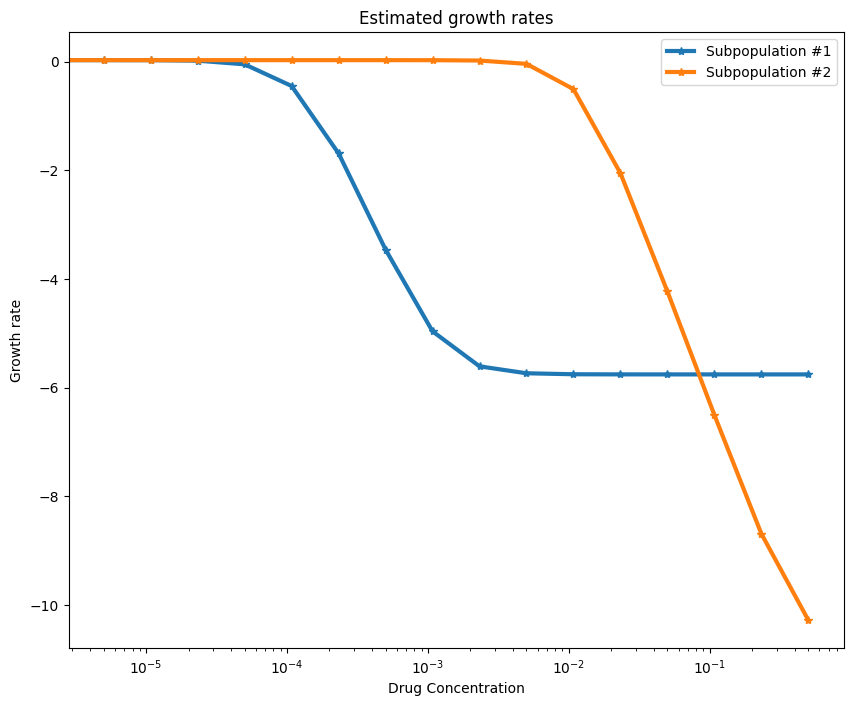

In [8]:
subpopulation_idx = 'best'
plot_growth_curves(result, concentrations, subpopulation_idx);

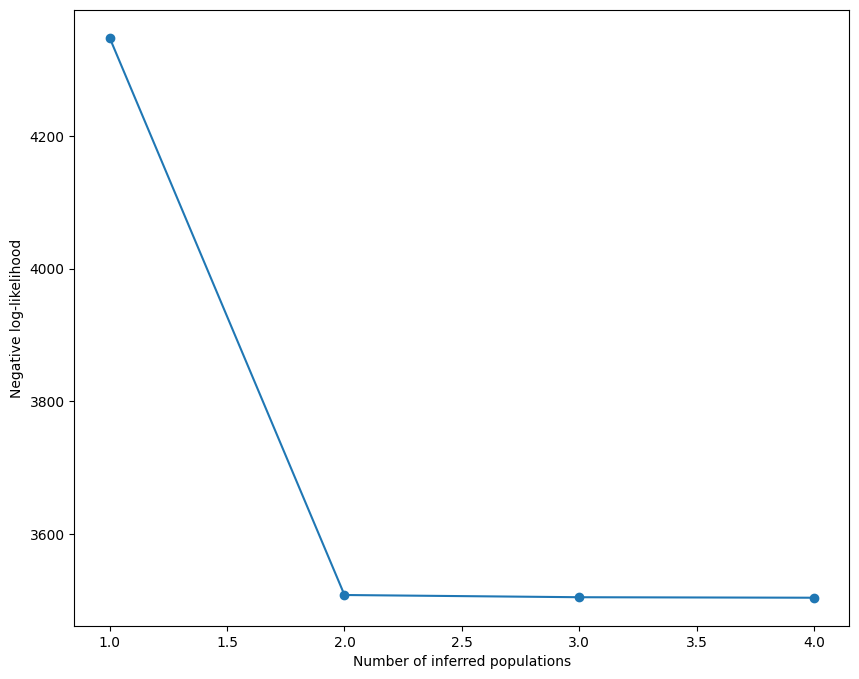

In [9]:
plot_elbow(result);

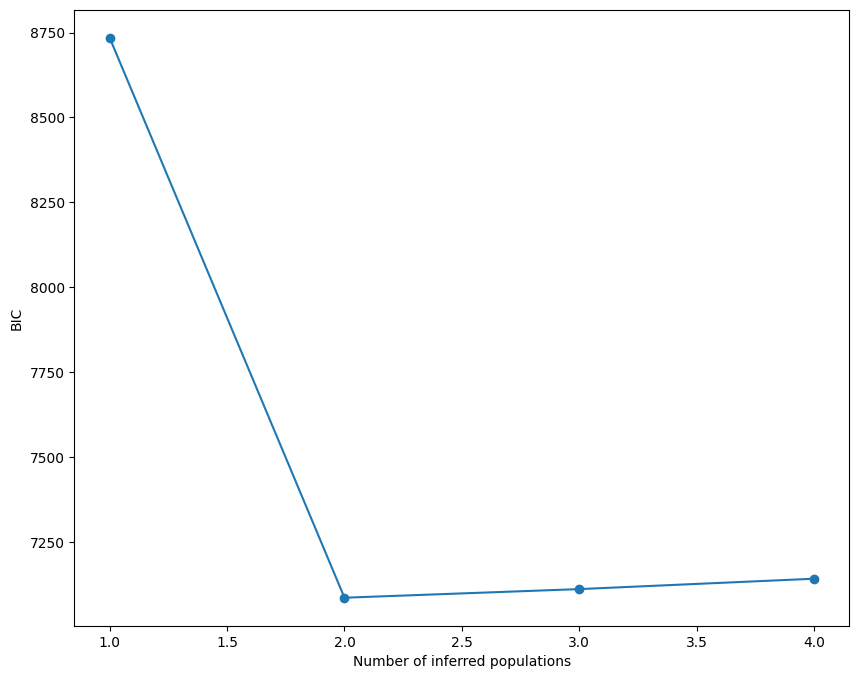

In [10]:
plot_bic(result);

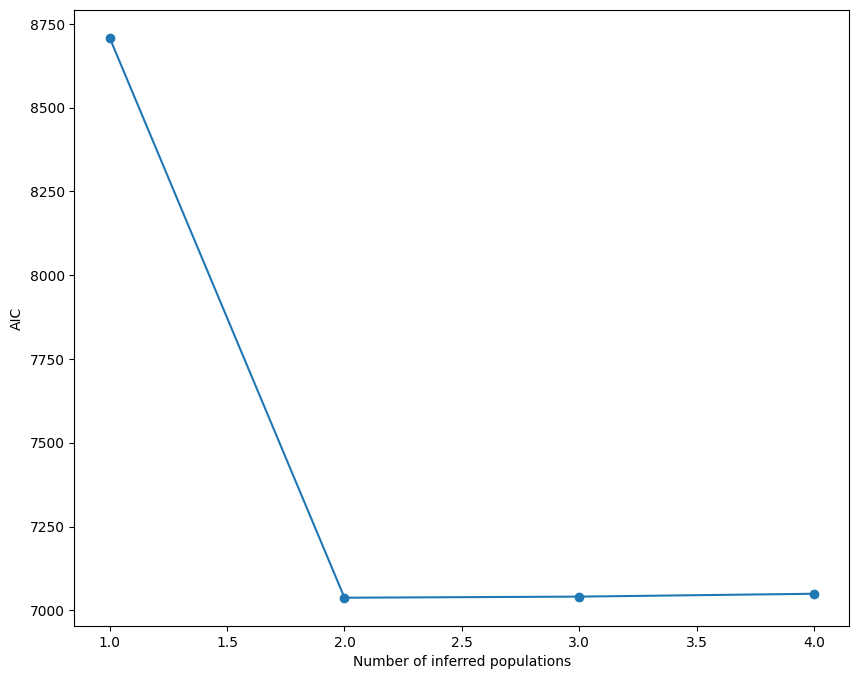

In [12]:
plot_aic(result);